In [1]:
# Imports
import cv2
import numpy as np
import tensorflow as tf
import notMNIST_gen
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [2]:
def reformat_dataset(data):
  data = data / 255.
  return data.reshape((-1, data.shape[1], data.shape[1], 1)).astype(np.float32)

def reformat_labels(labels):
  char_labels = list(np.unique(labels)) #np.unique(train_labels.view('S1').reshape((labels.size, -1)))
  char_labels.pop(0)
  digit_counts = np.zeros((labels.shape[0]), dtype=np.float32)
  new_labels = np.ndarray(labels.shape, dtype=np.float32)
  for i in range(new_labels.shape[0]):
    for j in range(new_labels.shape[1]):
        curr_label = labels[i,j]
        if curr_label in char_labels:
            new_labels[i,j] = char_labels.index(curr_label)
        if curr_label != b' ':
            digit_counts[i] += 1
  new_labels = (np.arange(len(char_labels)) == new_labels[:,:,None]).astype(np.float32)
  return new_labels, digit_counts

In [3]:
def bbox_patch(subplot, bbox):
    '''
    Draw bounding boxes onto plot
    : subplot: plot to draw bounding box onto
    : bbox: array of shape [digits, x, y, width, height]
    '''
    for i in range(bbox.shape[0]):
        if np.sum(bbox[i]) > 0:
            subplot.add_patch(Rectangle((bbox[i,0], bbox[i, 1]), bbox[i, 2], 
                                        bbox[i, 3], fill=False))
def visual_check(samples, subplt_h=5):
    '''
    Plot randomly selected samples with their bounding boxes.
    : samples: a list of tuples, each tuple defined as (title, dataset, bbox)
    : subplt_h: number of cells in each subplot dimension, default of 5 results in 25 samples
    '''
    f, axarr = plt.subplots(subplt_h, subplt_h)     
    for r in range(subplt_h):
        for c in range(subplt_h):
            data = np.random.randint(0, 3)
            sample = np.random.randint(0,samples[data][1].shape[0])
            axarr[r, c].set_title(samples[data][0] + ' ' + str(sample))
            axarr[r, c].imshow(samples[data][1][sample])
            bbox_patch(axarr[r, c], samples[data][2][sample])

Starting
Download Complete
Extract Complete
Saving Complete
Data Dictionaries Built
Loaded Training set (100000, 64, 64) (100000, 5)
Loaded Validation set (10000, 64, 64) (10000, 5)
Loaded Test set (10000, 64, 64) (10000, 5)
Formatted Training set (100000, 64, 64, 1) (100000, 5)
Formatted Validation set (10000, 64, 64, 1) (10000, 5)
Formatted Test set (10000, 64, 64, 1) (10000, 5)


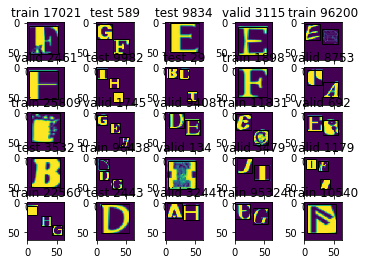

In [4]:
save = notMNIST_gen.gen_composite()
train_dataset = save['train_dataset']
train_bbox = save['train_bbox']
train_labels = save['train_labels']
valid_dataset = save['valid_dataset']
valid_bbox = save['valid_bbox']
valid_labels = save['valid_labels']
test_dataset = save['test_dataset']
test_bbox = save['test_bbox']
test_labels = save['test_labels']
del save  # Done with save, delete to free memory

data = [('train', train_dataset, train_bbox),
        ('test', test_dataset, test_bbox),
        ('valid', valid_dataset, valid_bbox)]

visual_check(data)

print('Loaded Training set', train_dataset.shape, train_labels.shape)
print('Loaded Validation set', valid_dataset.shape, valid_labels.shape)
print('Loaded Test set', test_dataset.shape, test_labels.shape)

train_dataset = reformat_dataset(train_dataset)
valid_dataset = reformat_dataset(valid_dataset)
test_dataset = reformat_dataset(test_dataset)

reform_train_labels, train_digits = reformat_labels(train_labels)
reform_valid_labels, valid_digits = reformat_labels(valid_labels)
reform_test_labels, test_digits = reformat_labels(test_labels)

print('Formatted Training set', train_dataset.shape, train_labels.shape)
print('Formatted Validation set', valid_dataset.shape, valid_labels.shape)
print('Formatted Test set', test_dataset.shape, test_labels.shape)

In [5]:
print(train_labels[0:5], train_digits[0:5])

[[b'H' b'F' b'E' b'C' b' ']
 [b'C' b'D' b'I' b'A' b'I']
 [b'A' b' ' b' ' b' ' b' ']
 [b'B' b'J' b' ' b' ' b' ']
 [b'H' b'F' b' ' b' ' b' ']] [ 4.  5.  1.  2.  2.]


In [6]:
print(reform_train_labels[0:5])

[[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
  [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
  [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
  [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

 [[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
  [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]]

 [[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

 [[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
  [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
  [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
  [ 1.  0.  0.  0.  0.  

In [7]:
def batch_input(image_shape):
    """
    Return a Tensor for a bach of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    x = tf.placeholder(tf.float32, shape=(None, image_shape[0], image_shape[1], 
                                             image_shape[2]), name='x')
    return x

def label_input(max_digits, n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    y = tf.placeholder(tf.float32, shape=(None, max_digits, n_classes), name='y')
    return y

def digits_input():
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    y = tf.placeholder(tf.float32, shape=(None), name='z')
    return y


def keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    keep_prob =  tf.placeholder(tf.float32, name='keep_prob')
    return keep_prob

def null_activation(batch):
    return batch

In [8]:
def conv_pool(batch, conv_patch=(1,1), conv_strides=(1,1), pool_patch=(1,1), pool_strides=(1,1), 
              outputs=1, conv_pad='SAME', pool_pad='SAME', weight_stddev=0.1, initial_bias=1.0, 
              activation=tf.nn.relu, keep_prob=1):

    weights = tf.Variable(tf.truncated_normal([conv_patch[0], conv_patch[1], 
                                               batch.get_shape().as_list()[3], 
                                               outputs], stddev=weight_stddev))
    bias = tf.Variable(tf.constant(initial_bias, shape=[outputs]))
    
    conv = tf.nn.conv2d(batch, weights, [1, conv_strides[0], conv_strides[1], 1], padding=conv_pad)
    conv = tf.add(conv, bias)
    conv = tf.nn.max_pool(conv, [1, pool_patch[0], pool_patch[1], 1], 
                          [1, pool_strides[0], pool_strides[1], 1], padding=pool_pad)
    conv = activation(conv)
    conv = tf.nn.dropout(conv, keep_prob)
    return conv

In [9]:
def full_conn(batch, outputs=128, keep_prob=1, weight_stddev=0.1, initial_bias=1.0, activation=tf.nn.relu):
    shape = batch.get_shape().as_list()
    weights = tf.Variable(tf.truncated_normal([shape[1], outputs], stddev=weight_stddev))
    bias = tf.Variable(tf.constant(initial_bias, shape=[outputs]))
    
    conn = tf.matmul(batch, weights)
    conn = tf.add(conn, bias)
    conn = activation(conn)
    conn = tf.nn.dropout(conn, keep_prob)
    return conn

In [10]:
def flatten(batch):
    shape = batch.get_shape().as_list()
    new_dim = 1
    for i in shape[1:]:
        new_dim *= i
    return tf.reshape(batch, (-1, new_dim))

In [20]:
def make_batch(data, labels, digits, epoch, batch_size=16, batch_count=16):
    group_size = data.shape[0] // batch_count
    group_offset = batch_size*epoch
    for i in range(0, batch_count):
        batch_offset = i*group_size
        index = (batch_offset+group_offset) % data.shape[0]
        yield data[index:index+batch_size,:,:,:], labels[index:index+batch_size,:, :], digits[index:index+batch_size]

In [21]:
def train_neural_network(epoch, session, optimizer, data, labels, digits, batch_size=16, batch_count=16, keep_probability=1.):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    for batch_data, batch_labels, batch_digits in make_batch(data, labels, digits, epoch, batch_size, batch_count):
        feed_dict = {x:batch_data, y:batch_labels, z:batch_digits, keep_prob:keep_probability}
        fetches = [optimizer]
        session.run(fetches, feed_dict=feed_dict)

In [96]:
def print_stats(session, name, data, labels, digits, cost, accuracy, epoch=0, batch_size=100, batch_count=10):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    loss = list()
    acc = list()
    for batch_data, batch_labels, batch_digits in make_batch(data, labels, digits, epoch, batch_size, batch_count):
        feed_dict = {x:batch_data, y:batch_labels, z:batch_digits, keep_prob:1}
        batch_loss, batch_acc = session.run([cost, accuracy], feed_dict=feed_dict)
        loss.append(batch_loss)
        acc.append(batch_acc/batch_size)
    print('\t'+name+': loss {:6.4f} and accuracy {:5.2f}%'.format(np.mean(loss), np.mean(acc)), end='\t')

In [90]:
def conv_net(batch, keep_prob=1):
#    print(batch.get_shape().as_list())
    model = conv_pool(batch, outputs=32, conv_patch=(7,7), conv_strides=(2,2), pool_patch=(3,3), pool_strides=(2,2))
#    print(model.get_shape().as_list())
    model = conv_pool(model, outputs=256, conv_patch=(5,5), conv_strides=(2,2), pool_patch=(2,2), pool_strides=(1,1))
#    print(model.get_shape().as_list())
    model = conv_pool(model, outputs=512, conv_patch=(3,3), conv_strides=(2,2), pool_patch=(1,1), pool_strides=(1,1))
    model = conv_pool(model, outputs=1024, conv_patch=(3,3), conv_strides=(1,1), pool_patch=(1,1), pool_strides=(1,1))    
#    print(model.get_shape().as_list())

    model = flatten(model)

#    model = full_conn(model, 512, keep_prob)
#    model = full_conn(model, 256, keep_prob)
#    model = full_conn(model, 128, keep_prob)
#    model = full_conn(model, 10, activation=null_activation)
    return model

In [91]:
pass

In [92]:
def addr_accuracy(predictions, labels, digits):
    correct_digits = (np.argmax(predictions, 2) == np.argmax(labels, 2))
    correct_addrs = np.all(correct_digits, 1)
    return (100.0 * np.sum(correct_addrs) / predictions.shape[0])

In [93]:
max_digits = 5

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = batch_input((64, 64, 1))
y = label_input(max_digits, 10)
z = digits_input()
keep_prob = keep_prob_input()

# Model
conv_model = conv_net(x, keep_prob)
digits = full_conn(conv_model, outputs=1, keep_prob=1, activation=null_activation)
#len_acc = len_accuracy(digits, z)

'''
max_digits = 5
logits_list = list()
for i in range(5):
    logits_list.append(full_conn(conv_model, outputs=10, keep_prob=1, activation=null_activation))

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='digit_logits')
'''
# Loss and Optimizer
cost = tf.reduce_mean(tf.square(tf.subtract(z, digits)))
#cost = tf.add(tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y)),
#              tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=digits, labels=z)))

optimizer = tf.train.AdamOptimizer().minimize(cost)

In [94]:
# TODO: Tune Parameters
epochs = 20
batch_size = 64
batch_count = 256
keep_probability = 0.5

accuracy = tf.reduce_sum(tf.cast(tf.equal(tf.round(z), tf.round(digits)), tf.float32))

In [ ]:
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        train_neural_network(epoch, sess, optimizer, train_dataset, reform_train_labels, 
                             train_digits, batch_size, batch_count, keep_probability)
        print('Epoch {:>2}:  '.format(epoch+1), end='')
        print_stats(sess, 'Train', train_dataset, reform_train_labels, train_digits, cost, 
                    accuracy, epoch, batch_size, batch_count)
        print_stats(sess, 'Valid', valid_dataset, reform_valid_labels, valid_digits, cost, 
                    accuracy, 0, batch_size, batch_count)
        print('')
    print_stats(sess, 'test', test_dataset, reform_test_labels, test_digits, cost, accuracy, 
                0, batch_size, batch_count)

Epoch  1:  	Train: loss 21.6021 and accuracy  5.52%		Valid: loss 22.3725 and accuracy  5.53%	
Epoch  2:  	Train: loss 15.5740 and accuracy  6.63%		Valid: loss 16.1968 and accuracy  6.63%	
Epoch  3:  	Train: loss 13.2784 and accuracy  7.17%		Valid: loss 13.4816 and accuracy  7.14%	
Epoch  4:  	Train: loss 14.8803 and accuracy  6.48%		Valid: loss 15.3723 and accuracy  6.20%	
Epoch  5:  	Train: loss 21.3024 and accuracy  4.26%		Valid: loss 21.4045 and accuracy  4.19%	
Epoch  6:  	Train: loss 21.1022 and accuracy  4.11%		Valid: loss 21.3761 and accuracy  4.10%	
Epoch  7:  	Train: loss 17.6774 and accuracy  4.86%		Valid: loss 18.0907 and accuracy  4.94%	
Epoch  8:  	Train: loss 18.7615 and accuracy  4.09%		Valid: loss 18.9704 and accuracy  3.99%	
Epoch  9:  	Train: loss 8.4282 and accuracy  8.37%		Valid: loss 8.5580 and accuracy  8.22%	
Epoch 10:  	Train: loss 8.2723 and accuracy  8.36%		Valid: loss 8.5283 and accuracy  8.06%	
Epoch 11:  	Train: loss 12.3515 and accuracy  5.40%		Valid: loss

In [ ]:
print(train_dataset.shape, train_labels.shape, train_digits.shape)

In [ ]:
samples = [('train', train_digit_string.reshape((train_digit_string.shape[0], 64, 64)), train_bbox),
        ('test', test_digit_string.reshape((test_digit_string.shape[0], 64, 64)), test_bbox),
        ('valid', valid_digit_string.reshape((valid_digit_string.shape[0], 64, 64)), valid_bbox)]

subplt_h = 5
f, axarr = plt.subplots(subplt_h, subplt_h)     
for r in range(subplt_h):
    for c in range(subplt_h):
        data = np.random.randint(0, 3)
        sample = np.random.randint(0,samples[data][1].shape[0])
        axarr[r, c].set_title(samples[data][0] + ' ' + str(sample))
        axarr[r, c].imshow(samples[data][1][sample])